In [9]:
%matplotlib inline

#importing libraries
import matplotlib.pyplot as plt

import torch
from torch import nn
from torch import optim
from torchvision import datasets, transforms

import helper

In [10]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,))])

# Download and load the training data
trainset = datasets.FashionMNIST("~pytorch/F_MNIST_data/", download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST("~pytorch/F_MNIST_data/", download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

<AxesSubplot:>

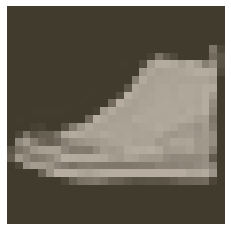

In [14]:
# Run this to test the data loader
images, labels = next(iter(trainloader))
helper.imshow(images[0], normalize=True)

In [15]:
input_layer = 784
hidden_layers = [256, 128, 64]
output_layer = 10

model = nn.Sequential(
                    nn.Linear(input_layer, hidden_layers[0]),
                    nn.ReLU(),
                    nn.Dropout(p=0.2),
                    nn.Linear(hidden_layers[0], hidden_layers[1]),
                    nn.ReLU(),
                    nn.Dropout(p=0.2),
                    nn.Linear(hidden_layers[1], hidden_layers[2]),
                    nn.ReLU(),
                    nn.Dropout(p=0.2),
                    nn.Linear(hidden_layers[2], output_layer),
                    nn.Softmax(dim=1))

print(model)

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.2, inplace=False)
  (3): Linear(in_features=256, out_features=128, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.2, inplace=False)
  (6): Linear(in_features=128, out_features=64, bias=True)
  (7): ReLU()
  (8): Dropout(p=0.2, inplace=False)
  (9): Linear(in_features=64, out_features=10, bias=True)
  (10): Softmax(dim=1)
)


In [16]:
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.03)

epochs = 30
training_losses = []
testing_losses = []

for e in range(epochs):
    #training the model
    total_training_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)

        optimizer.zero_grad()
        logps = model(images)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()

        total_training_loss += loss.item()

    else:
        #testing the model
        total_testing_loss = 0
        test_correct = 0
        with torch.no_grad():
            model.eval() #dropout turns off
            for images, labels in testloader:
                images = images.view(images.shape[0], -1)
                logps = model(images)
                loss = criterion(logps, labels)
                total_testing_loss += loss.item()

                ps = torch.exp(model(images))

                top_p, top_class = ps.topk(1, dim=1)

                equals = top_class == labels.view(*top_class.shape)

                test_correct += torch.mean(equals.type(torch.FloatTensor))
                #test_correct += equals.sum().item()
            
        model.train() #dropout back on

        training_losses.append(total_training_loss / len(trainloader))
        testing_losses.append(total_testing_loss / len(testloader))

        print("Epoch: {}/{}...".format(e+1, epochs),
        "Training Loss: {:.3f}...".format(training_losses[-1]),
        "Testing Loss: {:.3f}...".format(testing_losses[-1]),
        "Accuracy: {:.3f}...".format(test_correct/len(testloader)))

Epoch: 1/30... Training Loss: -0.156... Testing Loss: -0.321... Accuracy: 0.335...
Epoch: 2/30... Training Loss: -0.449... Testing Loss: -0.593... Accuracy: 0.630...
Epoch: 3/30... Training Loss: -0.627... Testing Loss: -0.706... Accuracy: 0.724...
Epoch: 4/30... Training Loss: -0.714... Testing Loss: -0.753... Accuracy: 0.764...
Epoch: 5/30... Training Loss: -0.745... Testing Loss: -0.766... Accuracy: 0.773...
Epoch: 6/30... Training Loss: -0.761... Testing Loss: -0.771... Accuracy: 0.775...
Epoch: 7/30... Training Loss: -0.770... Testing Loss: -0.779... Accuracy: 0.783...
Epoch: 8/30... Training Loss: -0.777... Testing Loss: -0.783... Accuracy: 0.788...
Epoch: 9/30... Training Loss: -0.783... Testing Loss: -0.787... Accuracy: 0.791...
Epoch: 10/30... Training Loss: -0.787... Testing Loss: -0.791... Accuracy: 0.793...
Epoch: 11/30... Training Loss: -0.791... Testing Loss: -0.792... Accuracy: 0.794...
Epoch: 12/30... Training Loss: -0.794... Testing Loss: -0.796... Accuracy: 0.798...
E

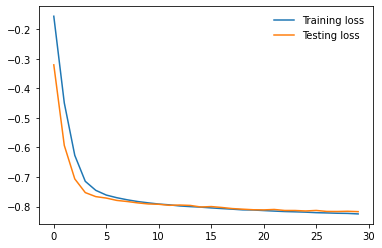

In [18]:
plt.plot(training_losses, label="Training loss")
plt.plot(testing_losses, label="Testing loss")
plt.legend(frameon=False)

tensor(7)


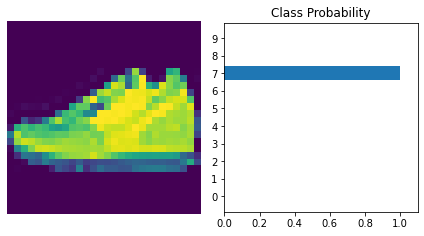

In [19]:
images, labels = next(iter(testloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])

helper.view_classify(images[0].view(1,28,28), ps)
print(labels[0])